In [24]:
import os

import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
import datetime

date_var = datetime.datetime.now().strftime("%Y%m%d")

In [3]:
import spatialdata as sd

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [4]:
import sys

sys.path.append("/home")
import src.cell_annotation_utils as cell_annotation
import src.sdata_utils as utils

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [5]:
data_dir = os.path.abspath("../data")
!ls -l $data_dir

lrwxrwxrwx 1 ra98gaq pn52ra 53 Mar 12 17:01 /dss/dsshome1/0C/ra98gaq/Git/cellseg-benchmark/data -> /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark


In [6]:
sample_name = "foxf2_s2_r1"

# Load sdata

In [7]:
sdata_path = os.path.join(data_dir, "samples", sample_name, "sdata_z3.zarr")
if "sdata" not in locals():
    sdata = sd.read_zarr(sdata_path)

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/zarr/creation.py:614: UserWarnin

In [8]:
sdata

SpatialData object, with associated Zarr store: /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark/samples/foxf2_s2_r1/sdata_z3.zarr
├── Images
│     └── 'foxf2_s2_r1_z3': DataTree[cyx] (8, 54456, 65675), (8, 27228, 32837), (8, 13614, 16418), (8, 6807, 8209), (8, 3403, 4104)
├── Points
│     └── 'foxf2_s2_r1_transcripts': DataFrame with shape: (<Delayed>, 9) (2D points)
├── Shapes
│     ├── 'boundaries_Baysor_2D_CP1Merlin_075': GeoDataFrame shape: (124658, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_CP1_020': GeoDataFrame shape: (145848, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_CP1_080': GeoDataFrame shape: (133435, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_CP2_020': GeoDataFrame shape: (148669, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_CP2_080': GeoDataFrame shape: (128401, 1) (2D shapes)
│     ├── 'boundaries_Baysor_2D_nucleus_100': GeoDataFrame shape: (147154, 1) (2D shapes)
│     ├── 'boundaries_Baysor_3D': GeoDataFrame shape: (149500, 1) (2D shapes)
│     ├──

In [9]:
adata_keys = list(sdata.tables.keys())
adata_keys

['adata_Baysor_2D_CP1Merlin_075',
 'adata_Baysor_2D_CP1_020',
 'adata_Baysor_2D_CP1_080',
 'adata_Baysor_2D_CP2_020',
 'adata_Baysor_2D_CP2_080',
 'adata_Baysor_2D_nucleus_100',
 'adata_Baysor_3D',
 'adata_Cellpose_1_DAPI_PolyT',
 'adata_Cellpose_1_DAPI_Transcripts',
 'adata_Cellpose_1_Merlin',
 'adata_Cellpose_1_nuclei_model',
 'adata_Cellpose_2_DAPI_PolyT',
 'adata_Cellpose_2_DAPI_Transcripts',
 'adata_ComSeg',
 'adata_Ficture',
 'adata_Negative_Control_Rastered_10',
 'adata_Negative_Control_Rastered_25',
 'adata_Negative_Control_Rastered_5',
 'adata_Negative_Control_Voronoi',
 'adata_Proseg']

In [10]:
len(adata_keys)

20

In [16]:
# check which adata keys don't have a column containing "cell_outlier" in their obs dataframe
missing_outlier_keys = []
for key in adata_keys:
    if not any("cell_outlier" in col for col in sdata[key].obs.columns):
        missing_outlier_keys.append(key)
missing_outlier_keys

[]

In [14]:
sdata["adata_Negative_Control_Rastered_25"].obs.head(2)

,index,region,slide,cell_id,area,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,cell_outlier,...,score_Neurons-Dopa,score_Astrocytes,score_Neurons-Immature,score_Bergmann,score_Neurons-Other,score_Neurons-Dopa-Gaba,score_Neurons-Gaba,score_Neurons-Glyc-Gaba,score_Neurons-Glut,cell_type_final
aaaaaaaa-1,aaaaaaaa-1,image_patches,20240322_Foxf2-Slide02-cp-WT-PCKO_region_1-WT5...,aaaaaaaa-1,622.379247,0,0.0,0,0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
aaaaaaab-1,aaaaaaab-1,image_patches,20240322_Foxf2-Slide02-cp-WT-PCKO_region_1-WT5...,aaaaaaab-1,625.073529,0,0.0,0,0.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


# Load and export annotations to sdata  
Run once

In [14]:
# Load mapmycells annotations and merge into sdata[key] for all adata_keys
for adata_key in [key for key in adata_keys if key.startswith("adata_")]:
    adata_name = adata_key.replace("adata_", "")

    annotation_path = os.path.join(
        data_dir,
        "samples",
        sample_name,
        "results",
        adata_name,
        "cell_type_annotation",
        "adata_obs_annotated.csv",
    )

    if not os.path.exists(annotation_path):
        print(adata_name + ": No annotation file found. Skipped.")
        continue

    annotations = pd.read_csv(annotation_path, index_col=0)

    is_proseg = adata_key == "adata_Proseg"
    id_column = "cell" if is_proseg else "cell_id"

    common_cols = set(sdata[adata_key].obs.columns).intersection(
        set(annotations.columns)
    )
    common_cols.discard(id_column)
    drop_cols = list(common_cols)
    for col in ["slide", "region", "area"]:
        if col in annotations.columns:
            drop_cols.append(col)

    # Store original index
    original_index = sdata[adata_key].obs.index.copy()

    # Perform merge
    merged_obs = pd.merge(
        sdata[adata_key].obs.reset_index(),
        annotations.drop(columns=drop_cols),
        on=id_column,
        how="left",
    )

    # Set index back to original type for compatibility with sadata saving
    merged_obs.index = original_index
    assert merged_obs.index.equals(original_index), "Index mismatch after merge"

    # Update sdata with type-preserved DataFrame
    sdata[adata_key].obs = merged_obs

Cellpose_1_Merlin: No annotation file found. Skipped.
Ficture: No annotation file found. Skipped.


In [15]:
for adata_key in [key for key in adata_keys if key.startswith("adata_")]:
    # convert object to string for spatialdata export compatibility

    # sdata[adata_key].obs = sdata[adata_key].obs.drop(columns=[col for col in sdata[adata_key].obs.columns if col.startswith(("score_", "leiden_"))])
    # Convert all object columns to str
    object_columns = sdata[adata_key].obs.select_dtypes(include=["object"]).columns
    sdata[adata_key].obs[object_columns] = (
        sdata[adata_key].obs[object_columns].astype(str)
    )

In [16]:
# check which adata keys don't have a column containing "cell_type_final" in their obs dataframe
missing_outlier_keys = []
for key in adata_keys:
    if not any("cell_type_final" in col for col in sdata[key].obs.columns):
        missing_outlier_keys.append(key)
missing_outlier_keys

['adata_Cellpose_1_Merlin', 'adata_Ficture']

In [ ]:
# Save annotations in adata to disk

In [17]:
adata_keys = list(sdata.tables.keys())
filtered_keys = [key for key in adata_keys if key not in missing_outlier_keys]
filtered_keys

['adata_Baysor_2D_CP1Merlin_075',
 'adata_Baysor_2D_CP1_020',
 'adata_Baysor_2D_CP1_080',
 'adata_Baysor_2D_CP2_020',
 'adata_Baysor_2D_CP2_080',
 'adata_Baysor_2D_nucleus_100',
 'adata_Baysor_3D',
 'adata_Cellpose_1_DAPI_PolyT',
 'adata_Cellpose_1_DAPI_Transcripts',
 'adata_Cellpose_1_nuclei_model',
 'adata_Cellpose_2_DAPI_PolyT',
 'adata_Cellpose_2_DAPI_Transcripts',
 'adata_ComSeg',
 'adata_Negative_Control_Rastered_10',
 'adata_Negative_Control_Rastered_25',
 'adata_Negative_Control_Rastered_5',
 'adata_Negative_Control_Voronoi',
 'adata_Proseg']

In [18]:
len(filtered_keys)

18

In [ ]:
# save to disk
# for key in keys:
#    sdata.write_element(key, overwrite=True)
# cannot overwrite object that is in use
# run workaround instead:

for key in filtered_keys:
    print(key)
    utils.update_element(sdata, key)

# fails if sdata is accessed by someone else

In [20]:
# check which adata keys don't have a column containing "cell_type_final" in their obs dataframe
missing_outlier_keys = []
for key in adata_keys:
    if not any("cell_type_final" in col for col in sdata[key].obs.columns):
        missing_outlier_keys.append(key)
missing_outlier_keys

['adata_Cellpose_1_Merlin', 'adata_Ficture']

# Metrics

In [98]:
# check which adata keys don't have a column containing "cell_type_final" in their obs dataframe
missing_outlier_keys = []
for key in adata_keys:
    if not any("cell_type_final" in col for col in sdata[key].obs.columns):
        missing_outlier_keys.append(key)
missing_outlier_keys

['adata_Cellpose_1_Merlin', 'adata_Ficture']

In [99]:
adata_keys = list(sdata.tables.keys())
filtered_keys = [key for key in adata_keys if key not in missing_outlier_keys]
filtered_keys

['adata_Baysor_2D_CP1Merlin_075',
 'adata_Baysor_2D_CP1_020',
 'adata_Baysor_2D_CP1_080',
 'adata_Baysor_2D_CP2_020',
 'adata_Baysor_2D_CP2_080',
 'adata_Baysor_2D_nucleus_100',
 'adata_Baysor_3D',
 'adata_Cellpose_1_DAPI_PolyT',
 'adata_Cellpose_1_DAPI_Transcripts',
 'adata_Cellpose_1_nuclei_model',
 'adata_Cellpose_2_DAPI_PolyT',
 'adata_Cellpose_2_DAPI_Transcripts',
 'adata_ComSeg',
 'adata_Negative_Control_Rastered_10',
 'adata_Negative_Control_Rastered_25',
 'adata_Negative_Control_Rastered_5',
 'adata_Negative_Control_Voronoi',
 'adata_Proseg']

In [139]:
key

'adata_Baysor_2D_CP1Merlin_075'

In [144]:
adata = sdata[key].copy()
# adata = adata[~adata.obs.cell_outlier, :]
# assert not all(adata.obs.isna().any())

In [155]:
import scipy.sparse as sparse

processed_adata_dict = {}
for key in filtered_keys:
    try:
        print("Processing " + key)
        adata = sdata[key].copy()

        if sparse.issparse(adata.X):
            adata.X = sparse.csr_matrix(adata.X)

        if "cell_outlier" in adata.obs.columns:
            adata = adata[~adata.obs.cell_outlier, :]
            if sparse.issparse(adata.X):
                adata.X = sparse.csr_matrix(adata.X)

        if "counts" not in adata.layers:
            adata.layers["counts"] = adata.X.copy()
        adata.X = adata.layers["counts"].copy()

        # Normalize based on available data
        if "area" in adata.obs.columns:
            cell_annotation.normalize_counts(adata, method="area")
        elif "volume" in adata.obs.columns:
            cell_annotation.normalize_counts(adata, method="volume")
        cell_annotation.normalize_counts(adata, method="library")

        adata.X = adata.layers["zscore"]
        sc.tl.pca(adata)
        sc.pp.neighbors(adata)
        sc.tl.umap(adata)

        # Save in dictionary
        processed_adata_dict[key] = adata
    except Exception as e:
        print(f"Error processing {key}: {str(e)}")

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
/tmp/ipykernel_461264/3248116510.py:17: UserWarning: Trying to set a dense array with a sparse array on a view.Densifying the sparse array.This may

Error processing adata_Baysor_2D_CP1Merlin_075: 'coo_matrix' object is not subscriptable


/tmp/ipykernel_461264/3248116510.py:16: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"] = adata.X.copy()
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
/tmp/ipykernel_461264/3248116510.py:16: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers["counts"] = adata.X.copy()
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of

In [156]:
processed_adata_dict.keys()

dict_keys(['adata_Baysor_2D_CP1_020', 'adata_Baysor_2D_CP1_080', 'adata_Baysor_2D_CP2_020', 'adata_Baysor_2D_CP2_080', 'adata_Baysor_2D_nucleus_100', 'adata_Baysor_3D', 'adata_Cellpose_1_DAPI_PolyT', 'adata_Cellpose_1_DAPI_Transcripts', 'adata_Cellpose_1_nuclei_model', 'adata_Cellpose_2_DAPI_PolyT', 'adata_Cellpose_2_DAPI_Transcripts', 'adata_ComSeg', 'adata_Negative_Control_Rastered_10', 'adata_Negative_Control_Rastered_25', 'adata_Negative_Control_Rastered_5', 'adata_Negative_Control_Voronoi', 'adata_Proseg'])

In [ ]:
for key, adata in processed_adata_dict.items():
    filename = os.path.join(
        data_dir,
        "samples",
        sample_name,
        "results",
        "metrics",
        "adata_temp",
        f"{key}_processed_temp.h5ad.gz",
    )
    try:
        adata.write_h5ad(filename, compression="gzip")
    except (OSError, IOError) as e:
        print(f"Error writing file {filename}: {e}")
        continue
    except Exception as e:
        print(f"Unexpected error processing {key}: {e}")
        continue

## clustering_scores

In [ ]:
# Mean cluster Distance based on delaunay graph
# from sopa.spatial import spatial_neighbors, mean_distance
# spatial_neighbors(adata, [0, 1000])
# mean_distance(adata, "cell_type_dea", "cell_type_final")


In [159]:
# from https://elihei2.github.io/segger_dev/api/validation
# Calinski-Harabasz-Score und Silhouette score
from sklearn.metrics import calinski_harabasz_score, silhouette_score


def compute_clustering_scores(
    adata: ad.AnnData, cell_type_column: str = "cell_type_final", use_pca: bool = True
):
    """Compute the Calinski-Harabasz and Silhouette scores for an AnnData object based on the assigned cell types.

    Args:
    - adata: AnnData
        Annotated data object containing gene expression data and cell type assignments.
    - cell_type_column: str, default='celltype_major'
        Column name in `adata.obs` that specifies cell types.
    - use_pca: bool, default=True
        Whether to use PCA components as features. If False, use the raw data.

    Returns:
    - ch_score: float
        The Calinski-Harabasz score.
    - sh_score: float
        The Silhouette score.
    """
    if cell_type_column not in adata.obs:
        raise ValueError(f"Column '{cell_type_column}' must be present in adata.obs.")
    features = adata.X
    cell_indices = np.random.choice(adata.n_obs, 10000, replace=False)
    features = features[cell_indices, :]
    labels = adata[cell_indices, :].obs[cell_type_column]
    ch_score = calinski_harabasz_score(features, labels)
    sh_score = silhouette_score(features, labels)
    return ch_score, sh_score

In [161]:
clustering_scores = {}
for key, adata in processed_adata_dict.items():
    ch_score, sh_score = compute_clustering_scores(
        adata, cell_type_column="cell_type_final"
    )
    clustering_scores[key] = {
        "calinski_harabasz_score": float(ch_score),
        "silhouette_score": float(sh_score),
    }
scores_df = pd.DataFrame.from_dict(clustering_scores, orient="index")
scores_df.index = scores_df.index.str.replace("adata_", "")

In [176]:
scores_df

,calinski_harabasz_score,silhouette_score
Baysor_2D_CP1_020,95.460494,0.016229
Baysor_2D_CP1_080,73.424670,-0.097844
Baysor_2D_CP2_020,80.775134,-0.080231
Baysor_2D_CP2_080,76.124018,-0.099481
Baysor_2D_nucleus_100,71.659979,-0.103741
Baysor_3D,85.243268,0.002610
Cellpose_1_DAPI_PolyT,139.755639,0.008916
Cellpose_1_DAPI_Transcripts,87.337057,-0.018480
Cellpose_1_nuclei_model,167.551696,0.036182
Cellpose_2_DAPI_PolyT,104.803656,-0.007071


/tmp/ipykernel_461264/3833687046.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ch_bars = sns.barplot(x=sorted_df.index, y='calinski_harabasz_score', data=sorted_df, palette=custom_palette, ax=ax1)
/tmp/ipykernel_461264/3833687046.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sh_bars = sns.barplot(x=sorted_df.index, y='silhouette_score', data=sorted_df, palette=custom_palette, ax=ax2)


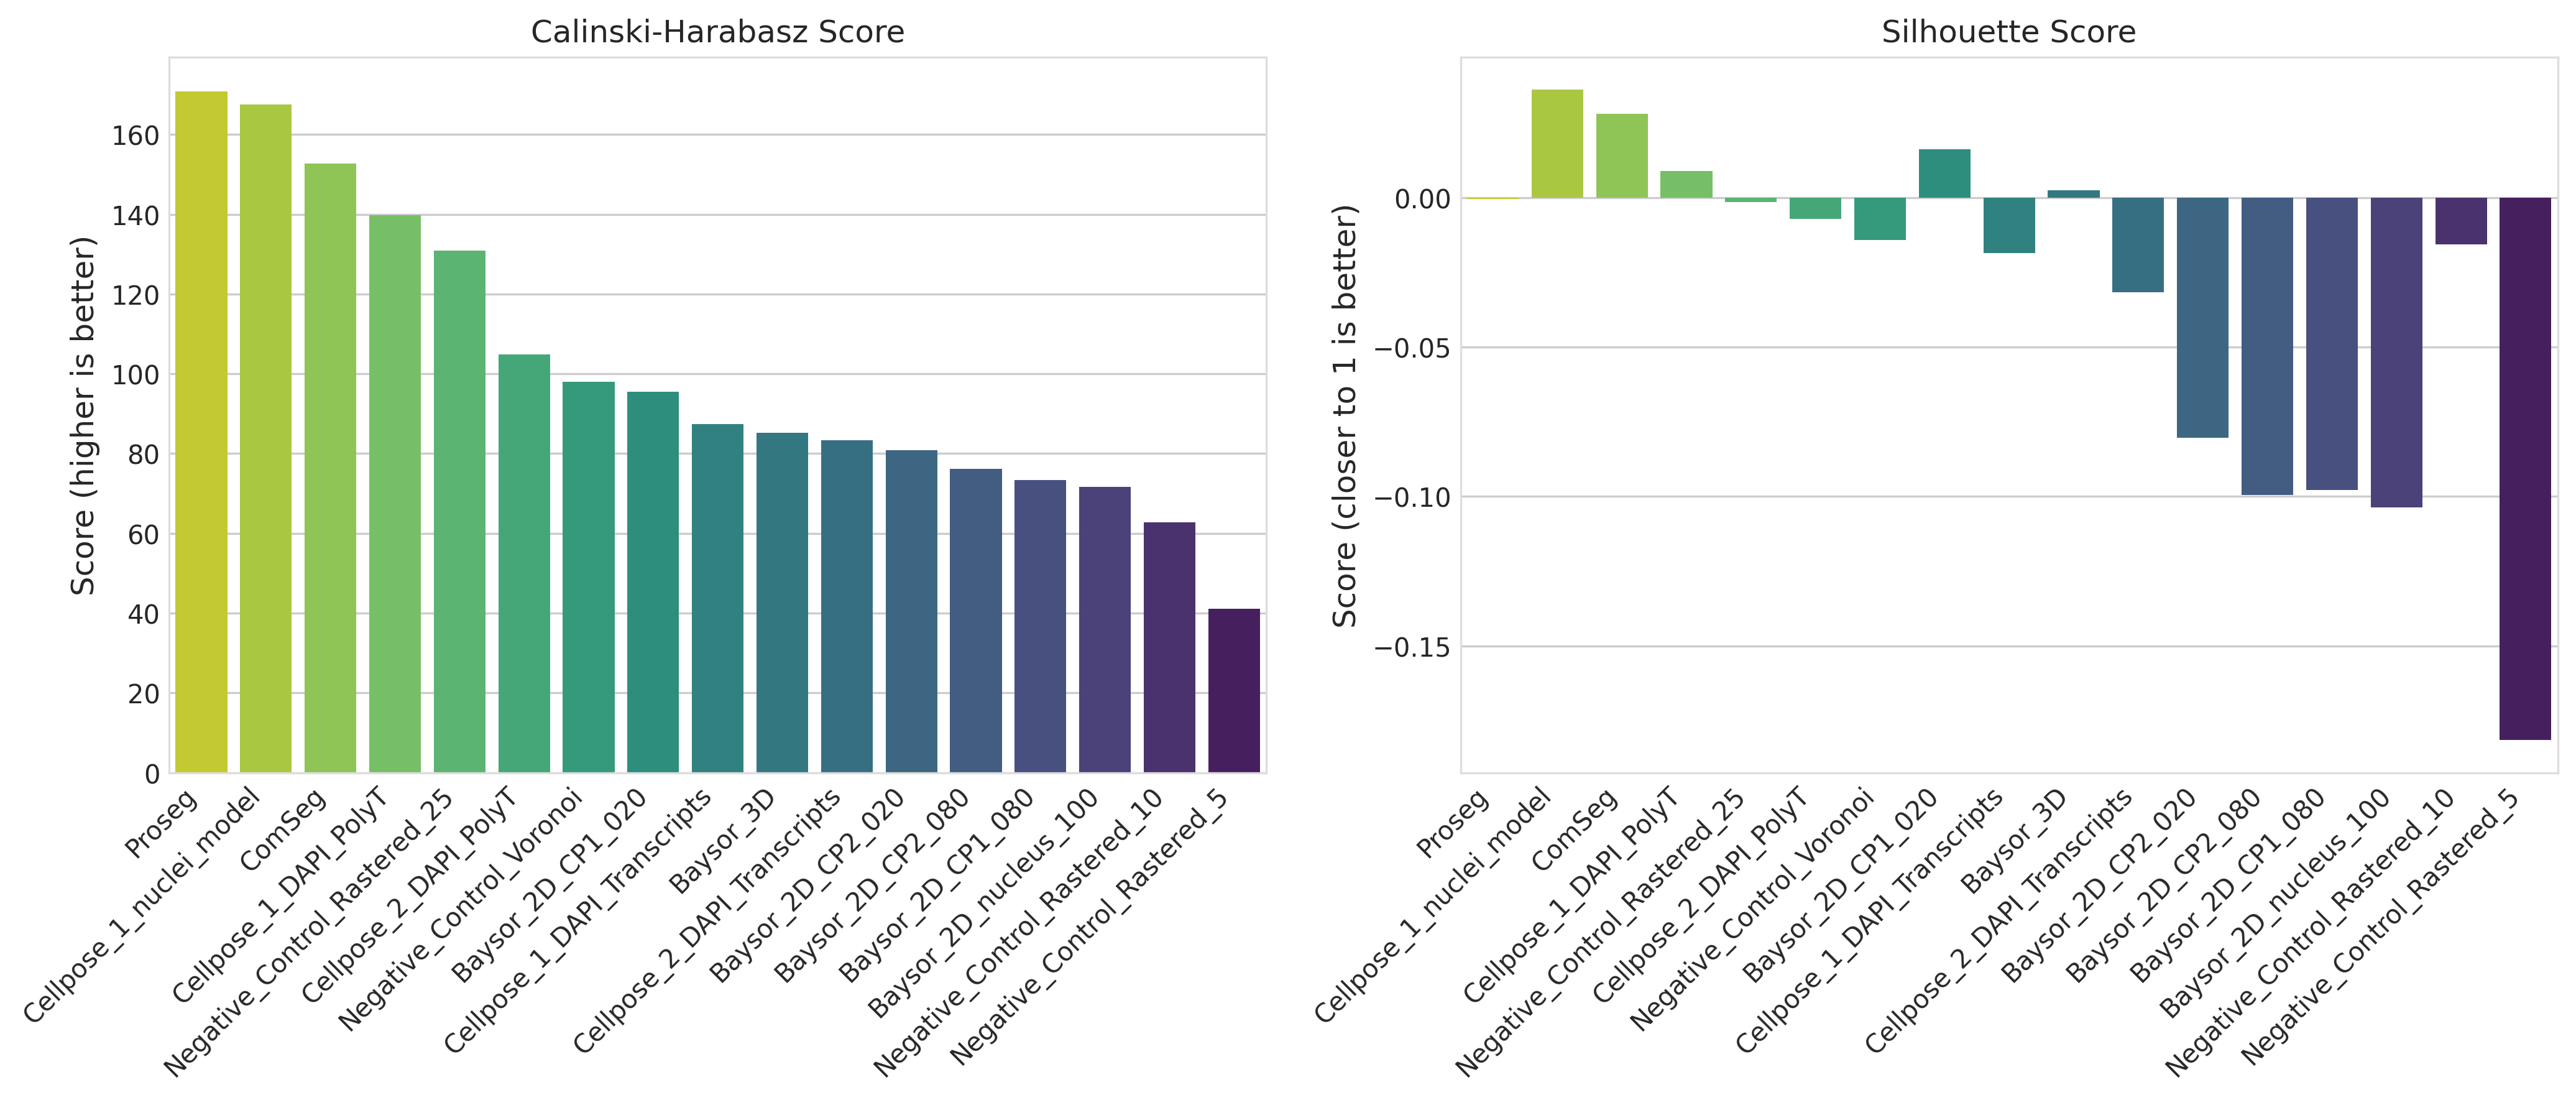

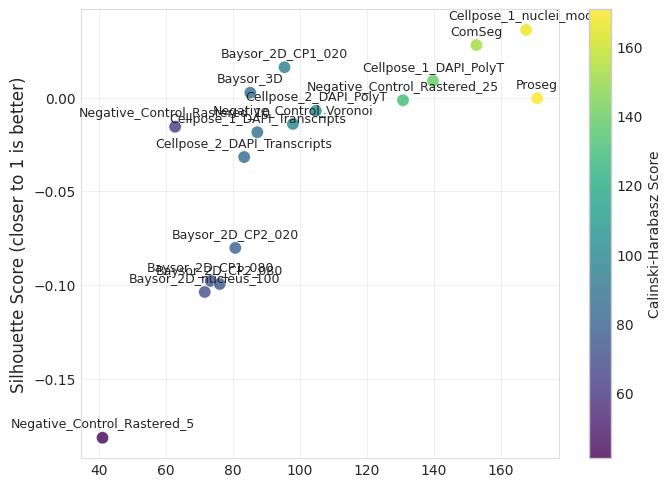

In [190]:
import pandas as pd

# Set theme
plt.style.use("seaborn-v0_8-whitegrid")

# Define a custom color palette
custom_palette = sns.color_palette("viridis_r", n_colors=len(scores_df))
custom_cmap = sns.color_palette("viridis_r", as_cmap=True)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

# Sort by CH score for consistent ordering
sorted_df = scores_df.sort_values("calinski_harabasz_score", ascending=False)

# Bar plot for Calinski-Harabasz scores with gradient colors
ch_bars = sns.barplot(
    x=sorted_df.index,
    y="calinski_harabasz_score",
    data=sorted_df,
    palette=custom_palette,
    ax=ax1,
)
ax1.set_title("Calinski-Harabasz Score", fontsize=12)
ax1.set_ylabel("Score (higher is better)", fontsize=12)

# Fix tick labels alignment - set x-ticks explicitly
ax1.set_xticks(np.arange(len(sorted_df.index)))
ax1.set_xticklabels(sorted_df.index, rotation=45, ha="right", fontweight="medium")
ax1.set_xlabel("")

# Bar plot for Silhouette scores with gradient colors
sh_bars = sns.barplot(
    x=sorted_df.index,
    y="silhouette_score",
    data=sorted_df,
    palette=custom_palette,
    ax=ax2,
)
ax2.set_title("Silhouette Score", fontsize=12)
ax2.set_ylabel("Score (closer to 1 is better)", fontsize=12)
ax2.set_xlabel("")

# Fix tick labels alignment for second plot as well
ax2.set_xticks(np.arange(len(sorted_df.index)))
ax2.set_xticklabels(sorted_df.index, rotation=45, ha="right", fontweight="medium")

# Add subtle border
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor("#dddddd")
        spine.set_linewidth(0.8)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Create a scatter plot to visualize relationship between scores
plt.figure(figsize=(7, 5))

# Create norm for colormap
norm = plt.Normalize(
    scores_df["calinski_harabasz_score"].min(),
    scores_df["calinski_harabasz_score"].max(),
)

# Scatter plot with viridis colormap based on CH score
scatter = plt.scatter(
    scores_df["calinski_harabasz_score"],
    scores_df["silhouette_score"],
    c=scores_df["calinski_harabasz_score"],
    cmap="viridis",
    s=80,
    alpha=0.8,
    edgecolor="white",
    linewidth=0.5,
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Calinski-Harabasz Score", fontsize=10)

# Add labels for each point
for i, txt in enumerate(scores_df.index):
    plt.annotate(
        txt,
        (
            scores_df["calinski_harabasz_score"].iloc[i],
            scores_df["silhouette_score"].iloc[i],
        ),
        fontsize=9,
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.xlabel("", fontsize=12)
plt.ylabel("Silhouette Score (closer to 1 is better)", fontsize=12)
plt.grid(True, alpha=0.3)

# Add a box around the plot with light gray color
plt.gca().spines["top"].set_visible(True)
plt.gca().spines["right"].set_visible(True)
for spine in plt.gca().spines.values():
    spine.set_edgecolor("#dddddd")
    spine.set_linewidth(0.8)

plt.tight_layout()
plt.show()

## incongruency / MECR

In [191]:
# load specific marker genes

In [192]:
# load marker genes
# from Allen mouse brain scRNA-seq atlas (Yao 2023 Nature, 4M cells)
# computed using edgeR of pseudobulks, using author-derived cell annotations (see separate script)
ABCAtlas_marker_df = pd.read_csv(
    os.path.join(
        data_dir,
        "misc",
        "scRNAseq_ref_ABCAtlas_Yao2023Nature",
        "marker_genes",
        "20250211_cell_type_markers_top15_specific.csv",
    )
)
# turn ABCAtlas_marker_df to dict
cell_types = ABCAtlas_marker_df.columns.tolist()
cell_type_dict = {}
for cell_type in cell_types:
    # Skip the index column (0) if present
    if cell_type == "0":
        continue
    # Get values from column, excluding the header row
    genes = ABCAtlas_marker_df[cell_type].iloc[0:].tolist()
    # Remove any NaN values
    genes = [gene for gene in genes if pd.notna(gene)]
    cell_type_dict[cell_type] = genes

In [215]:
# from https://elihei2.github.io/segger_dev/api/validation/#segger.validation.compute_MECR
from typing import Dict, List, Tuple

import anndata as ad


def compute_MECR(
    adata: ad.AnnData, gene_pairs: List[Tuple[str, str]]
) -> Dict[Tuple[str, str], float]:
    """Compute the Mutually Exclusive Co-expression Rate (MECR) for each gene pair in an AnnData object.

    Args:
    - adata: AnnData
        Annotated data object containing gene expression data.
    - gene_pairs: List[Tuple[str, str]]
        List of tuples representing gene pairs to evaluate.

    Returns:
    - mecr_dict: Dict[Tuple[str, str], float]
        Dictionary where keys are gene pairs (tuples) and values are MECR values.
    """
    mecr_dict = {}
    gene_expression = adata.to_df()
    for gene1, gene2 in gene_pairs:
        expr_gene1 = gene_expression[gene1] > 0
        expr_gene2 = gene_expression[gene2] > 0
        both_expressed = (expr_gene1 & expr_gene2).mean()
        at_least_one_expressed = (expr_gene1 | expr_gene2).mean()
        mecr = (
            both_expressed / at_least_one_expressed if at_least_one_expressed > 0 else 0
        )
        mecr_dict[(gene1, gene2)] = mecr
    return mecr_dict

In [275]:
mecr_scores = {}
for key, adata in processed_adata_dict.items():
    # get gene-pair list for MECR
    # all with all others
    # exclude those not in adata.var_names
    gene_pairs = []
    cell_types = list(cell_type_dict.keys())

    for i, cell_type1 in enumerate(cell_types):
        for cell_type2 in cell_types[i + 1 :]:
            for gene1 in cell_type_dict[cell_type1]:
                for gene2 in cell_type_dict[cell_type2]:
                    if gene1 in adata.var_names and gene2 in adata.var_names:
                        gene_pairs.append((gene1, gene2))

    mecr_scores[key] = compute_MECR(adata, gene_pairs)
# Convert nested dictionary to DataFrame
data = []
for dataset, scores in mecr_scores.items():
    for gene_pair, score in scores.items():
        data.append(
            {
                "dataset": dataset,
                "gene_pair": f"{gene_pair[0]}-{gene_pair[1]}",
                "MECR": float(score),
            }
        )
mecr_df = pd.DataFrame(data)
mecr_df["dataset"] = mecr_df["dataset"].str.replace("adata_", "")

In [276]:
import json

In [277]:
with open(
    os.path.join(
        data_dir, "samples", sample_name, "results", "metrics", "method_colors.json"
    ),
    "r",
) as f:
    color_map = json.load(f)

In [278]:
color_map

{'Baysor_2D_CP1Merlin_075': '#3366CC',
 'Baysor_2D_CP1_020': '#FF9900',
 'Baysor_2D_CP1_080': '#33CC33',
 'Baysor_2D_CP2_020': '#E31A1C',
 'Baysor_2D_CP2_080': '#9933CC',
 'Baysor_2D_nucleus_100': '#996633',
 'Baysor_3D': '#FF66B2',
 'Cellpose_1_DAPI_PolyT': '#666666',
 'Cellpose_1_DAPI_Transcripts': '#CCCC00',
 'Cellpose_1_nuclei_model': '#00CCCC',
 'Cellpose_2_DAPI_PolyT': '#003366',
 'Cellpose_2_DAPI_Transcripts': '#FF6600',
 'ComSeg': '#339900',
 'Ficture': '#CC0000',
 'Negative_Control_Rastered_10': '#800080',
 'Negative_Control_Rastered_25': '#8B4513',
 'Negative_Control_Rastered_5': '#FF1493',
 'Negative_Control_Voronoi': '#A9A9A9',
 'Proseg': '#20B2AA',
 'Cellpose_1_Merlin': '#FFD700'}

In [279]:
mecr_df

,dataset,gene_pair,MECR
0,Baysor_2D_CP1_020,Ccdc153-Cd163,0.053982
1,Baysor_2D_CP1_020,Ccdc153-Itga4,0.057515
2,Baysor_2D_CP1_020,Ccdc153-Pdgfc,0.056520
3,Baysor_2D_CP1_020,Foxj1-Cd163,0.097451
4,Baysor_2D_CP1_020,Foxj1-Itga4,0.096110
...,...,...,...
4857,Proseg,Vip-Itgb1,0.066621
4858,Proseg,Vip-Trpc1,0.064988
4859,Proseg,Slc17a7-Itgb1,0.237212
4860,Proseg,Slc17a7-Trpc1,0.299108


/tmp/ipykernel_461264/216780447.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


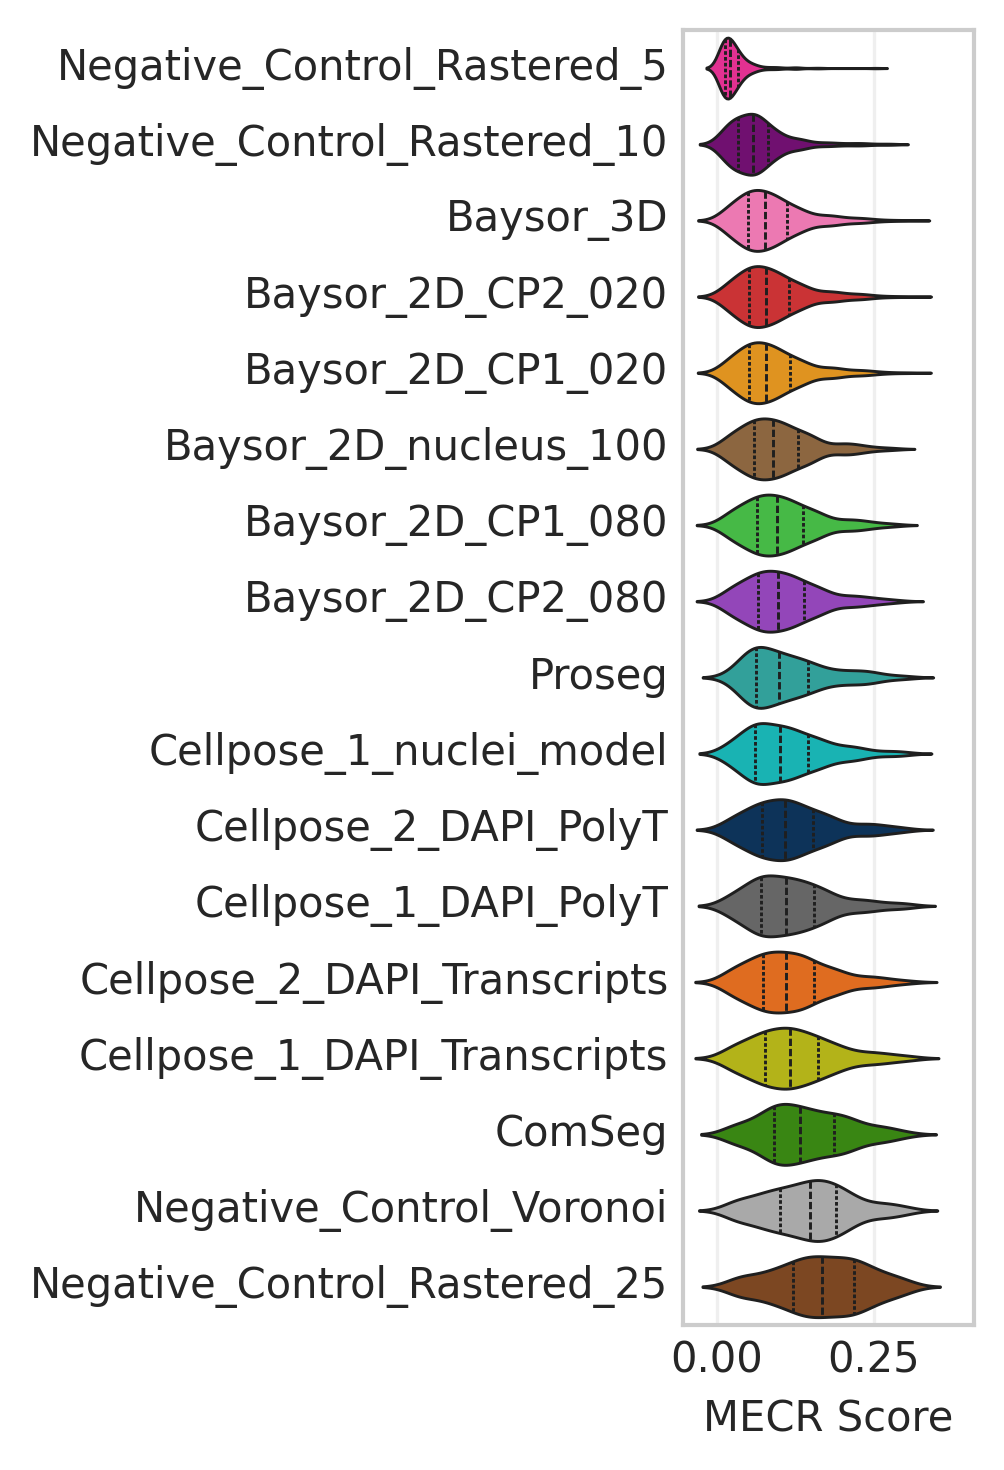

In [280]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Remove outliers and prepare for plotting
threshold = np.percentile(mecr_df["MECR"], 99)
mecr_df_filtered = mecr_df[mecr_df["MECR"] <= threshold]

# Order datasets by median MECR value
dataset_order = mecr_df_filtered.groupby("dataset")["MECR"].median().sort_values().index

# Create custom palette matching the dataset order
custom_palette = {dataset: color_map[dataset] for dataset in dataset_order}

plt.figure(figsize=(3.5, 5), dpi=300)
plt.grid(True, alpha=0.3, zorder=0)

# Create violin plot with quartile lines and custom colors
sns.violinplot(
    y="dataset",
    x="MECR",
    data=mecr_df_filtered,
    order=dataset_order,
    inner="quartile",
    linewidth=0.7,
    zorder=2,
    palette=custom_palette,  # Use the custom palette instead of hue
    legend=False,
)
plt.xlim(right=0.41)
plt.yticks(rotation=0, va="center")
plt.ylabel("")
plt.xlabel("MECR Score")
plt.tight_layout()
plt.show()

In [261]:
# use only vascular markers

In [265]:
# Use only vascular cell types for gene pairs
vascular_types = ["ECs", "Pericytes", "SMCs", "VLMCs"]
vascular_dict = {k: cell_type_dict[k] for k in vascular_types if k in cell_type_dict}

mecr_scores_vascular = {}
for key, adata in processed_adata_dict.items():
    # Create gene pairs from vascular markers only
    gene_pairs = []
    cell_types = list(vascular_dict.keys())
    for i, cell_type1 in enumerate(cell_types):
        for cell_type2 in cell_types[i + 1 :]:
            for gene1 in vascular_dict[cell_type1]:
                for gene2 in vascular_dict[cell_type2]:
                    if gene1 in adata.var_names and gene2 in adata.var_names:
                        gene_pairs.append((gene1, gene2))

    mecr_scores_vascular[key] = compute_MECR(adata, gene_pairs)

# Convert to DataFrame
data_vascular = []
for dataset, scores in mecr_scores_vascular.items():
    for gene_pair, score in scores.items():
        data_vascular.append(
            {
                "dataset": dataset,
                "gene_pair": f"{gene_pair[0]}-{gene_pair[1]}",
                "MECR": float(score),
            }
        )
mecr_df_vascular = pd.DataFrame(data_vascular)
mecr_df_vascular["dataset"] = mecr_df_vascular["dataset"].str.replace("adata_", "")

In [267]:
mecr_df = mecr_df_vascular.copy()

/tmp/ipykernel_461264/1839962801.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


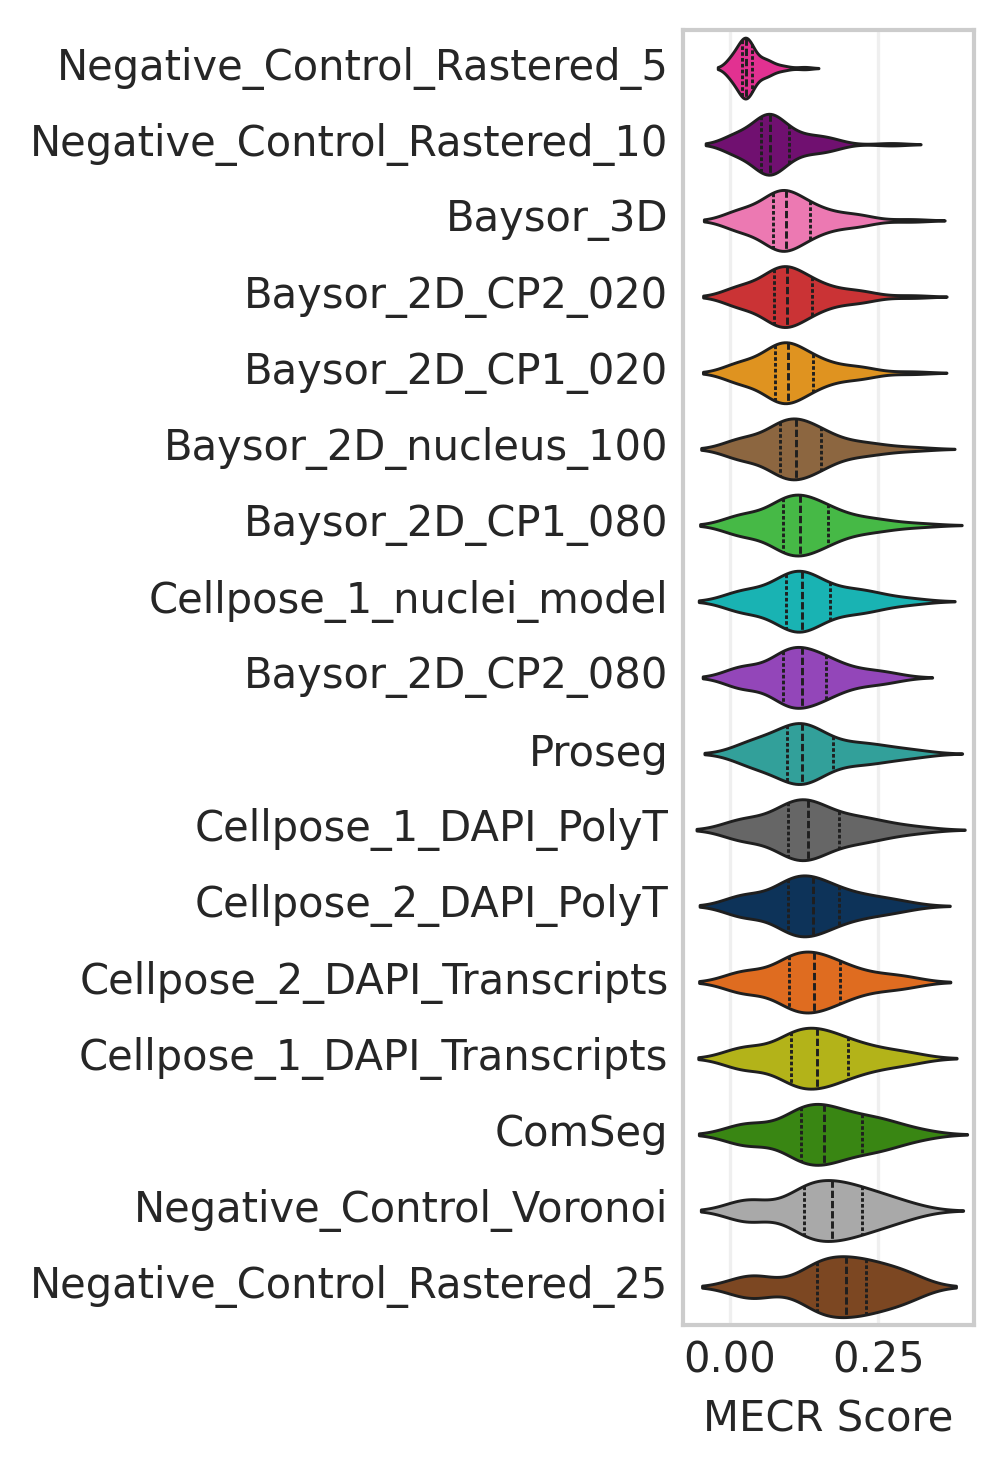

In [274]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Remove outliers and prepare for plotting
threshold = np.percentile(mecr_df["MECR"], 99)
mecr_df_filtered = mecr_df[mecr_df["MECR"] <= threshold]

# Order datasets by median MECR value
dataset_order = mecr_df_filtered.groupby("dataset")["MECR"].median().sort_values().index

# Create custom palette matching the dataset order
custom_palette = {dataset: color_map[dataset] for dataset in dataset_order}

plt.figure(figsize=(3.5, 5), dpi=300)
plt.grid(True, alpha=0.3, zorder=0)

# Create violin plot with quartile lines and custom colors
sns.violinplot(
    y="dataset",
    x="MECR",
    data=mecr_df_filtered,
    order=dataset_order,
    inner="quartile",
    linewidth=0.7,
    zorder=2,
    palette=custom_palette,  # Use the custom palette instead of hue
    legend=False,
)

plt.xlim(right=0.41)
plt.yticks(rotation=0, va="center")
plt.ylabel("")
plt.xlabel("MECR Score")
plt.tight_layout()
plt.show()

## Neighborhood contamination

In [293]:
# from https://elihei2.github.io/segger_dev/api/validation/?h=contamination#segger.validation.calculate_contamination
def calculate_contamination(
    adata: ad.AnnData,
    markers: Dict[str, Dict[str, List[str]]],
    radius: float = 15,
    n_neighs: int = 10,
    celltype_column: str = "celltype_major",
    num_cells: int = 10000,
) -> pd.DataFrame:
    """Calculate normalized contamination from neighboring cells of different cell types based on positive markers.

    Args:
    - adata: ad.AnnData
        Annotated data object with raw counts and cell type information.
    - markers: dict
        Dictionary where keys are cell types and values are dictionaries containing:
            'positive': list of top x% highly expressed genes
            'negative': list of top x% lowly expressed genes.
    - radius: float, default=15
        Radius for spatial neighbor calculation.
    - n_neighs: int, default=10
        Maximum number of neighbors to consider.
    - celltype_column: str, default='celltype_major'
        Column name in the AnnData object representing cell types.
    - num_cells: int, default=10000
        Number of cells to randomly select for the calculation.

    Returns:
    - contamination_df: pd.DataFrame
        DataFrame containing the normalized level of contamination from each cell type to each other cell type.
    """
    if celltype_column not in adata.obs:
        raise ValueError("Column celltype_column must be present in adata.obs.")
    positive_markers = {ct: markers[ct]["positive"] for ct in markers}
    # adata.obsm["spatial"] = adata.obs[["cell_centroid_x", "cell_centroid_y"]].copy().to_numpy()
    sq.gr.spatial_neighbors(
        adata, radius=radius, n_neighs=n_neighs, coord_type="generic"
    )
    neighbors = adata.obsp["spatial_connectivities"].tolil()
    raw_counts = adata[:, adata.var_names].layers["raw"].toarray()
    cell_types = adata.obs[celltype_column]
    selected_cells = np.random.choice(
        adata.n_obs, size=min(num_cells, adata.n_obs), replace=False
    )
    contamination = {
        ct: {ct2: 0 for ct2 in positive_markers.keys()}
        for ct in positive_markers.keys()
    }
    negighborings = {
        ct: {ct2: 0 for ct2 in positive_markers.keys()}
        for ct in positive_markers.keys()
    }
    for cell_idx in selected_cells:
        cell_type = cell_types[cell_idx]
        own_markers = set(positive_markers[cell_type])
        for marker in own_markers:
            if marker in adata.var_names:
                total_counts_in_neighborhood = raw_counts[
                    cell_idx, adata.var_names.get_loc(marker)
                ]
                for neighbor_idx in neighbors.rows[cell_idx]:
                    total_counts_in_neighborhood += raw_counts[
                        neighbor_idx, adata.var_names.get_loc(marker)
                    ]
                for neighbor_idx in neighbors.rows[cell_idx]:
                    neighbor_type = cell_types[neighbor_idx]
                    if cell_type == neighbor_type:
                        continue
                    neighbor_markers = set(positive_markers.get(neighbor_type, []))
                    contamination_markers = own_markers - neighbor_markers
                    for marker in contamination_markers:
                        if marker in adata.var_names:
                            marker_counts_in_neighbor = raw_counts[
                                neighbor_idx, adata.var_names.get_loc(marker)
                            ]
                            if total_counts_in_neighborhood > 0:
                                contamination[cell_type][neighbor_type] += (
                                    marker_counts_in_neighbor
                                    / total_counts_in_neighborhood
                                )
                                negighborings[cell_type][neighbor_type] += 1
    contamination_df = pd.DataFrame(contamination).T
    negighborings_df = pd.DataFrame(negighborings).T
    contamination_df.index.name = "Source Cell Type"
    contamination_df.columns.name = "Target Cell Type"
    return contamination_df / (negighborings_df + 1)

In [294]:
# load marker genes
# from Allen mouse brain scRNA-seq atlas (Yao 2023 Nature, 4M cells)
# computed using edgeR of pseudobulks, using author-derived cell annotations (see separate script)
ABCAtlas_marker_df = pd.read_csv(
    os.path.join(
        data_dir,
        "misc",
        "scRNAseq_ref_ABCAtlas_Yao2023Nature",
        "marker_genes",
        "20250211_cell_type_markers_top15_specific.csv",
    )
)
# turn ABCAtlas_marker_df to dict
cell_types = ABCAtlas_marker_df.columns.tolist()
cell_type_dict = {}
for cell_type in cell_types:
    # Skip the index column (0) if present
    if cell_type == "0":
        continue
    # Get values from column, excluding the header row
    genes = ABCAtlas_marker_df[cell_type].iloc[0:].tolist()
    # Remove any NaN values
    genes = [gene for gene in genes if pd.notna(gene)]
    cell_type_dict[cell_type] = genes

In [295]:
# format into positive and negative, but just copy same gene list. negative is not used in segger function anyway.
markers = {}
for cell_type, genes in cell_type_dict.items():
    markers[cell_type] = {"positive": genes, "negative": genes}

In [296]:
adata.X = adata.layers["counts"]

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


In [297]:
calculate_contamination(adata, markers, celltype_column="cell_type_final")

NameError: name 'sq' is not defined

In [298]:
import squidpy as sq

ModuleNotFoundError: No module named 'squidpy'

## FPR

In [390]:
# load marker genes
# from Allen mouse brain scRNA-seq atlas (Yao 2023 Nature, 4M cells)
# computed using edgeR of pseudobulks, using author-derived cell annotations (see separate script)
ABCAtlas_marker_df = pd.read_csv(
    os.path.join(
        data_dir,
        "misc",
        "scRNAseq_ref_ABCAtlas_Yao2023Nature",
        "marker_genes",
        # "20250211_cell_type_markers_top15_specific.csv",
        "20250211_cell_type_markers_top50.csv",
    )
)
ABCAtlas_marker_df = ABCAtlas_marker_df.head(15)
# turn ABCAtlas_marker_df to dict
cell_types = ABCAtlas_marker_df.columns.tolist()
cell_type_dict = {}
for cell_type in cell_types:
    # Skip the index column (0) if present
    if cell_type == "0":
        continue
    # Get values from column, excluding the header row
    genes = ABCAtlas_marker_df[cell_type].iloc[0:].tolist()
    # Remove any NaN values
    genes = [gene for gene in genes if pd.notna(gene)]
    cell_type_dict[cell_type] = genes

In [391]:
from scipy import sparse

In [392]:
import numpy as np
import pandas as pd


def compute_marker_false_positive_rate(
    adata, cell_type_col, marker_dict, cell_type_of_interest=None, layer=None
):
    """
    Compute false positive rate for marker genes in scRNA-seq data.

    Parameters:
    -----------
    adata : AnnData
        AnnData object containing scRNA-seq data
    cell_type_col : str
        Column name in adata.obs containing cell type annotations
    marker_dict : dict
        Dictionary mapping cell types to lists of marker genes
        e.g., {'EC': ['CLDN5', 'PECAM1'], 'Fibroblast': ['COL1A1', 'DCN']}
    cell_type_of_interest : str, optional
        Specific cell type to analyze. If None, all cell types in marker_dict will be analyzed
    layer : str, optional
        Name of layer in adata.layers to use for expression values. If None, adata.X is used.

    Returns:
    --------
    pd.DataFrame
        DataFrame with columns: 'cell_type', 'marker_gene', 'false_positive_rate'
    """
    # Ensure the cell type column exists in adata.obs
    if cell_type_col not in adata.obs.columns:
        raise ValueError(f"Cell type column '{cell_type_col}' not found in adata.obs")

    # Get all unique cell types in the dataset
    all_cell_types = adata.obs[cell_type_col].unique()

    # If cell_type_of_interest is specified, filter marker_dict
    if cell_type_of_interest is not None:
        if cell_type_of_interest not in marker_dict:
            raise ValueError(
                f"Cell type '{cell_type_of_interest}' not found in marker_dict"
            )
        marker_dict = {cell_type_of_interest: marker_dict[cell_type_of_interest]}

    # Initialize results data structure
    results = []

    # Get expression matrix from specified layer or adata.X
    if layer is not None:
        if layer not in adata.layers:
            raise ValueError(f"Layer '{layer}' not found in adata.layers")
        if not sparse.issparse(adata.layers[layer]):
            adata.layers[layer] = sparse.csr_matrix(adata.layers[layer])
        mat = adata.layers[layer]
    else:
        if not sparse.issparse(adata.X):
            adata.X = sparse.csr_matrix(adata.X)
        mat = adata.X

    # Iterate through cell types and their markers
    for cell_type, markers in marker_dict.items():
        # Check if cell type exists in the dataset
        if cell_type not in all_cell_types:
            print(f"Warning: Cell type '{cell_type}' not found in dataset. Skipping.")
            continue

        # Get indices of cells of this type and other types
        cells_of_type = adata.obs[cell_type_col] == cell_type
        cells_of_other_types = ~cells_of_type

        # Total number of cells of other types
        total_other_cells = np.sum(cells_of_other_types)

        # Process each marker gene
        for marker in markers:
            # Check if marker gene exists in the dataset
            if marker not in adata.var_names:
                print(
                    f"Warning: Marker gene '{marker}' not found in dataset. Skipping."
                )
                continue

            # Get gene index
            gene_idx = adata.var_names.get_loc(marker)

            # Consider a gene to be expressed if expression > 3
            # Convert sparse matrix to array for this operation
            if sparse.issparse(mat):
                # Get expression values for this gene and convert to dense array
                gene_expression = mat[:, gene_idx].toarray().flatten()
            else:
                gene_expression = mat[:, gene_idx]

            # Create expression mask
            expression_mask = gene_expression > 3

            # Convert to numpy array if necessary
            cells_of_other_types_array = np.array(cells_of_other_types)

            # Count cells of other types expressing the marker
            false_positives = np.sum(cells_of_other_types_array & expression_mask)

            # Calculate false positive rate
            false_positive_rate = (
                false_positives / total_other_cells if total_other_cells > 0 else 0
            )

            # Add result to the list
            results.append(
                {
                    "cell_type": cell_type,
                    "marker_gene": marker,
                    "false_positive_rate": false_positive_rate,
                    "false_positive_count": false_positives,
                    "total_other_cells": total_other_cells,
                }
            )

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    return results_df

In [352]:
compute_marker_false_positive_rate(
    adata,
    cell_type_col="cell_type_final",
    marker_dict=cell_type_dict,
    cell_type_of_interest="ECs",
    layer="counts",
)

,cell_type,marker_gene,false_positive_rate,false_positive_count,total_other_cells
0,ECs,Cldn5,0.018909,1477,78113
1,ECs,Ly6a,0.006683,522,78113
2,ECs,Abcb1a,0.026103,2039,78113
3,ECs,Tek,0.008936,698,78113
4,ECs,Slc7a5,0.080640,6299,78113


In [404]:
# Dictionary to store results from each dataset
results_dict = {}
for key, adata_sub in processed_adata_dict.items():
    result = compute_marker_false_positive_rate(
        adata_sub,
        cell_type_col="cell_type_final",
        marker_dict=cell_type_dict,
        cell_type_of_interest="Pericytes",
        layer="counts",
    )
    result["dataset"] = key
    results_dict[key] = result  # This is fine, storing each result separately by key
    print(f"Processed {key}: {len(result)} markers analyzed")

# Combine all results
if results_dict:
    all_results = pd.concat(results_dict.values(), ignore_index=True)

    # Create summary table
    summary = all_results.groupby("marker_gene").agg(
        {"false_positive_rate": ["mean", "min", "max", "std"], "dataset": "count"}
    )

    summary.columns = ["mean_fpr", "min_fpr", "max_fpr", "std_fpr", "n_datasets"]
    summary = summary.reset_index().sort_values("mean_fpr")

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Baysor_2D_CP1_020: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Baysor_2D_CP1_080: 6 markers analyzed
Processed adata_Baysor_2D_CP2_020: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Baysor_2D_CP2_080: 6 markers analyzed
Processed adata_Baysor_2D_nucleus_100: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Baysor_3D: 6 markers analyzed
Processed adata_Cellpose_1_DAPI_PolyT: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Cellpose_1_DAPI_Transcripts: 6 markers analyzed
Processed adata_Cellpose_1_nuclei_model: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Cellpose_2_DAPI_PolyT: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Cellpose_2_DAPI_Transcripts: 6 markers analyzed
Processed adata_ComSeg: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Negative_Control_Rastered_10: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Negative_Control_Rastered_25: 6 markers analyzed
Processed adata_Negative_Control_Rastered_5: 6 markers analyzed
Processed adata_Negative_Control_Voronoi: 6 markers analyzed


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


Processed adata_Proseg: 6 markers analyzed


/tmp/ipykernel_461264/3365727834.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


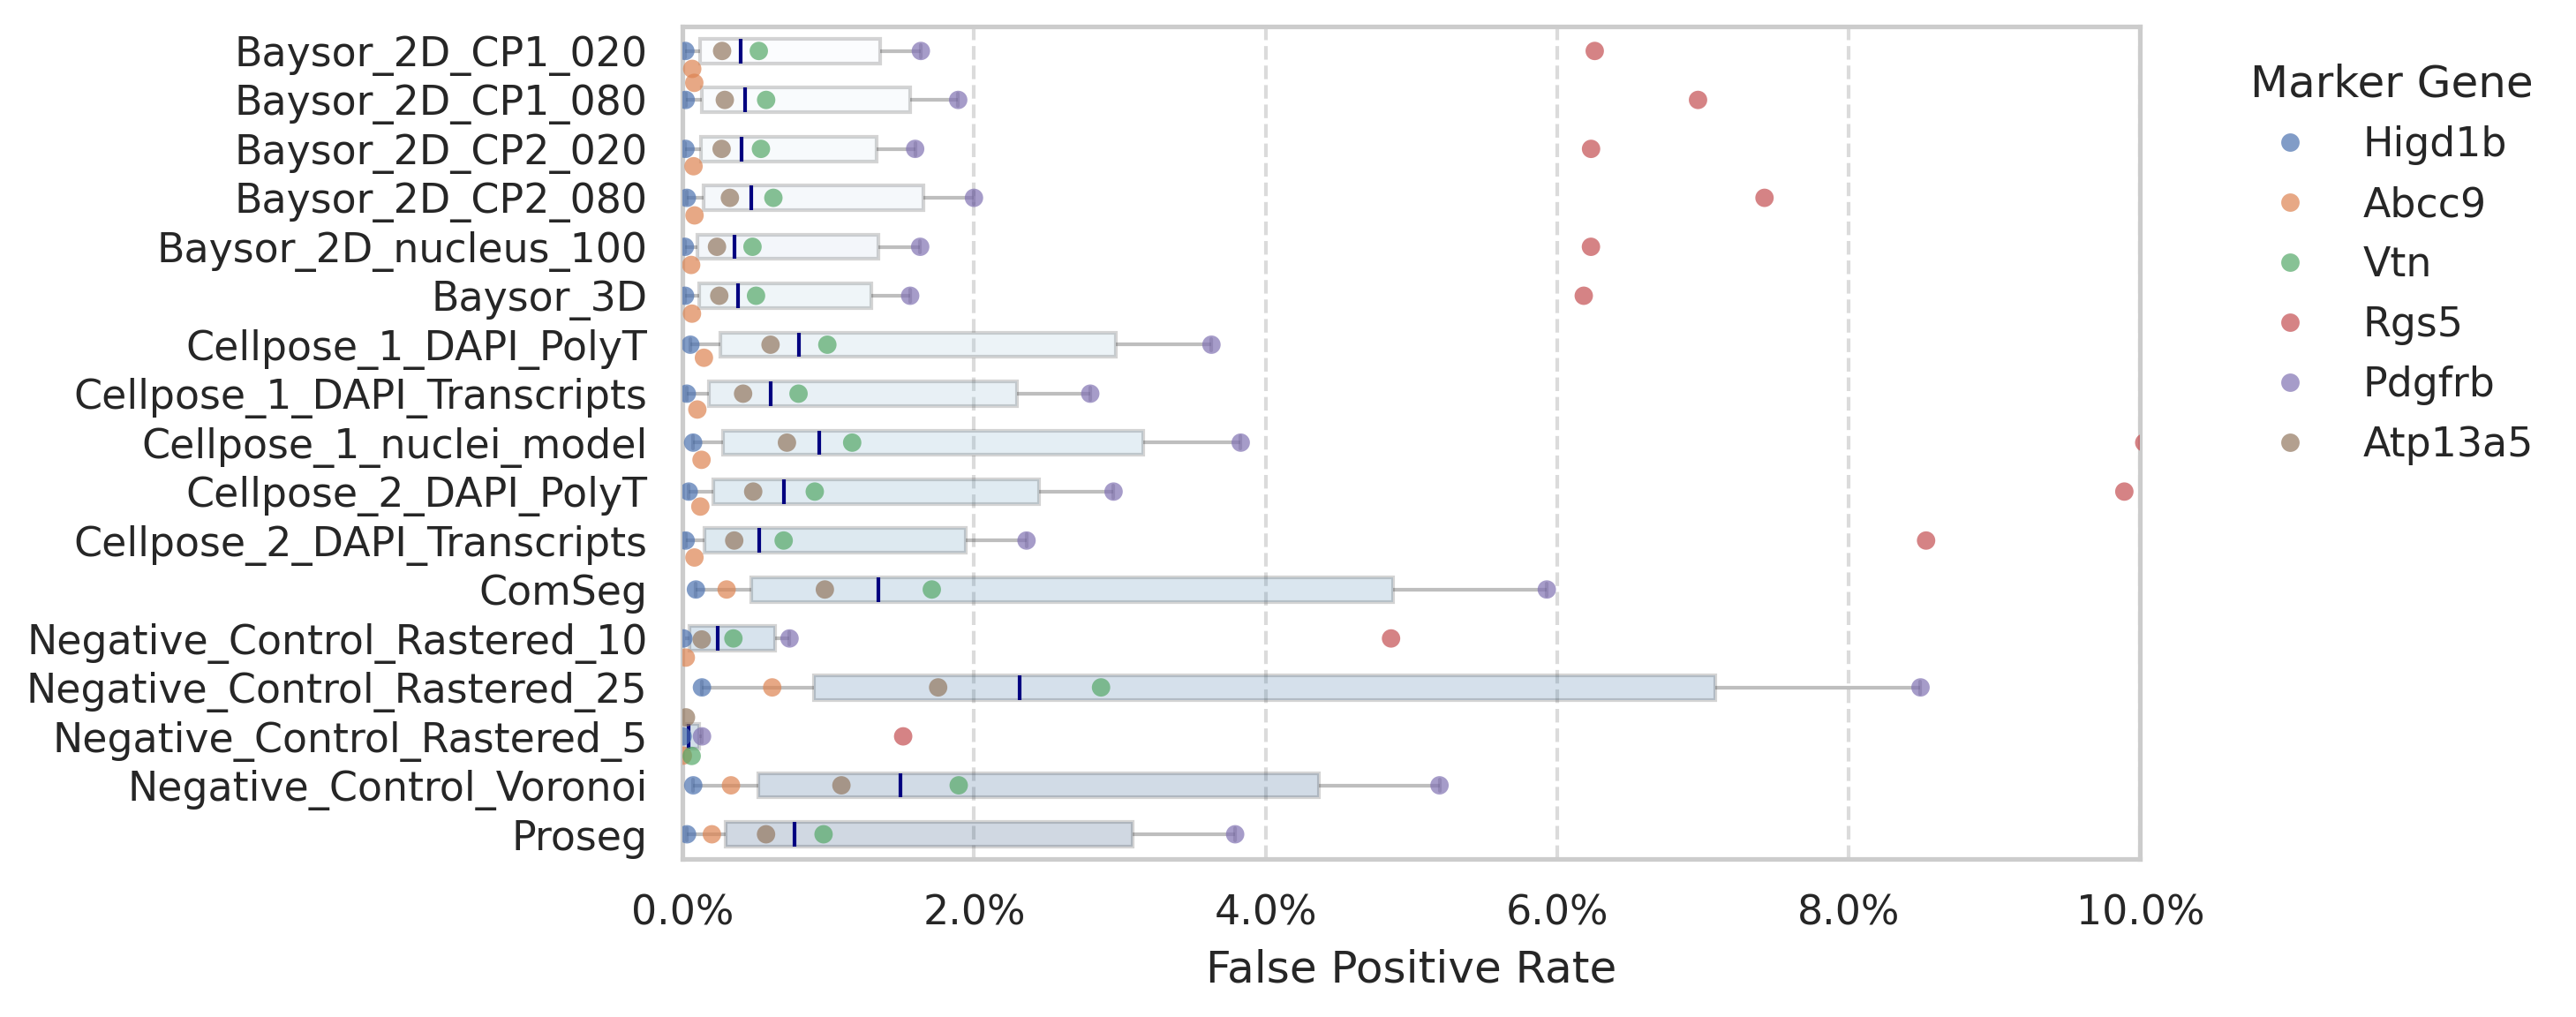

In [405]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Combine all results from the dictionary into a single DataFrame
all_results = pd.concat(results_dict.values(), ignore_index=True)

# Clean dataset names by removing "adata_" prefix
all_results["clean_dataset"] = all_results["dataset"].str.replace("adata_", "")

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4), dpi=300)

# Create horizontal box plot with cleaned dataset names and transparent boxes
ax = sns.boxplot(
    y="clean_dataset",
    x="false_positive_rate",
    data=all_results,
    palette="Blues",
    width=0.5,
    showfliers=False,
    boxprops=dict(alpha=0.2),
    medianprops=dict(color="navy"),
    whiskerprops=dict(alpha=0.3),
    capprops=dict(alpha=0.3),
)

# Add individual data points with swarm plot
sns.swarmplot(
    y="clean_dataset",
    x="false_positive_rate",
    hue="marker_gene",
    data=all_results,
    size=5,
    alpha=0.7,
    ax=ax,
)
plt.xlim(0, 0.1)
plt.ylabel("", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0, decimals=1))

# Adjust legend
plt.legend(title="Marker Gene", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add vertical grid lines
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

/tmp/ipykernel_461264/3656161094.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


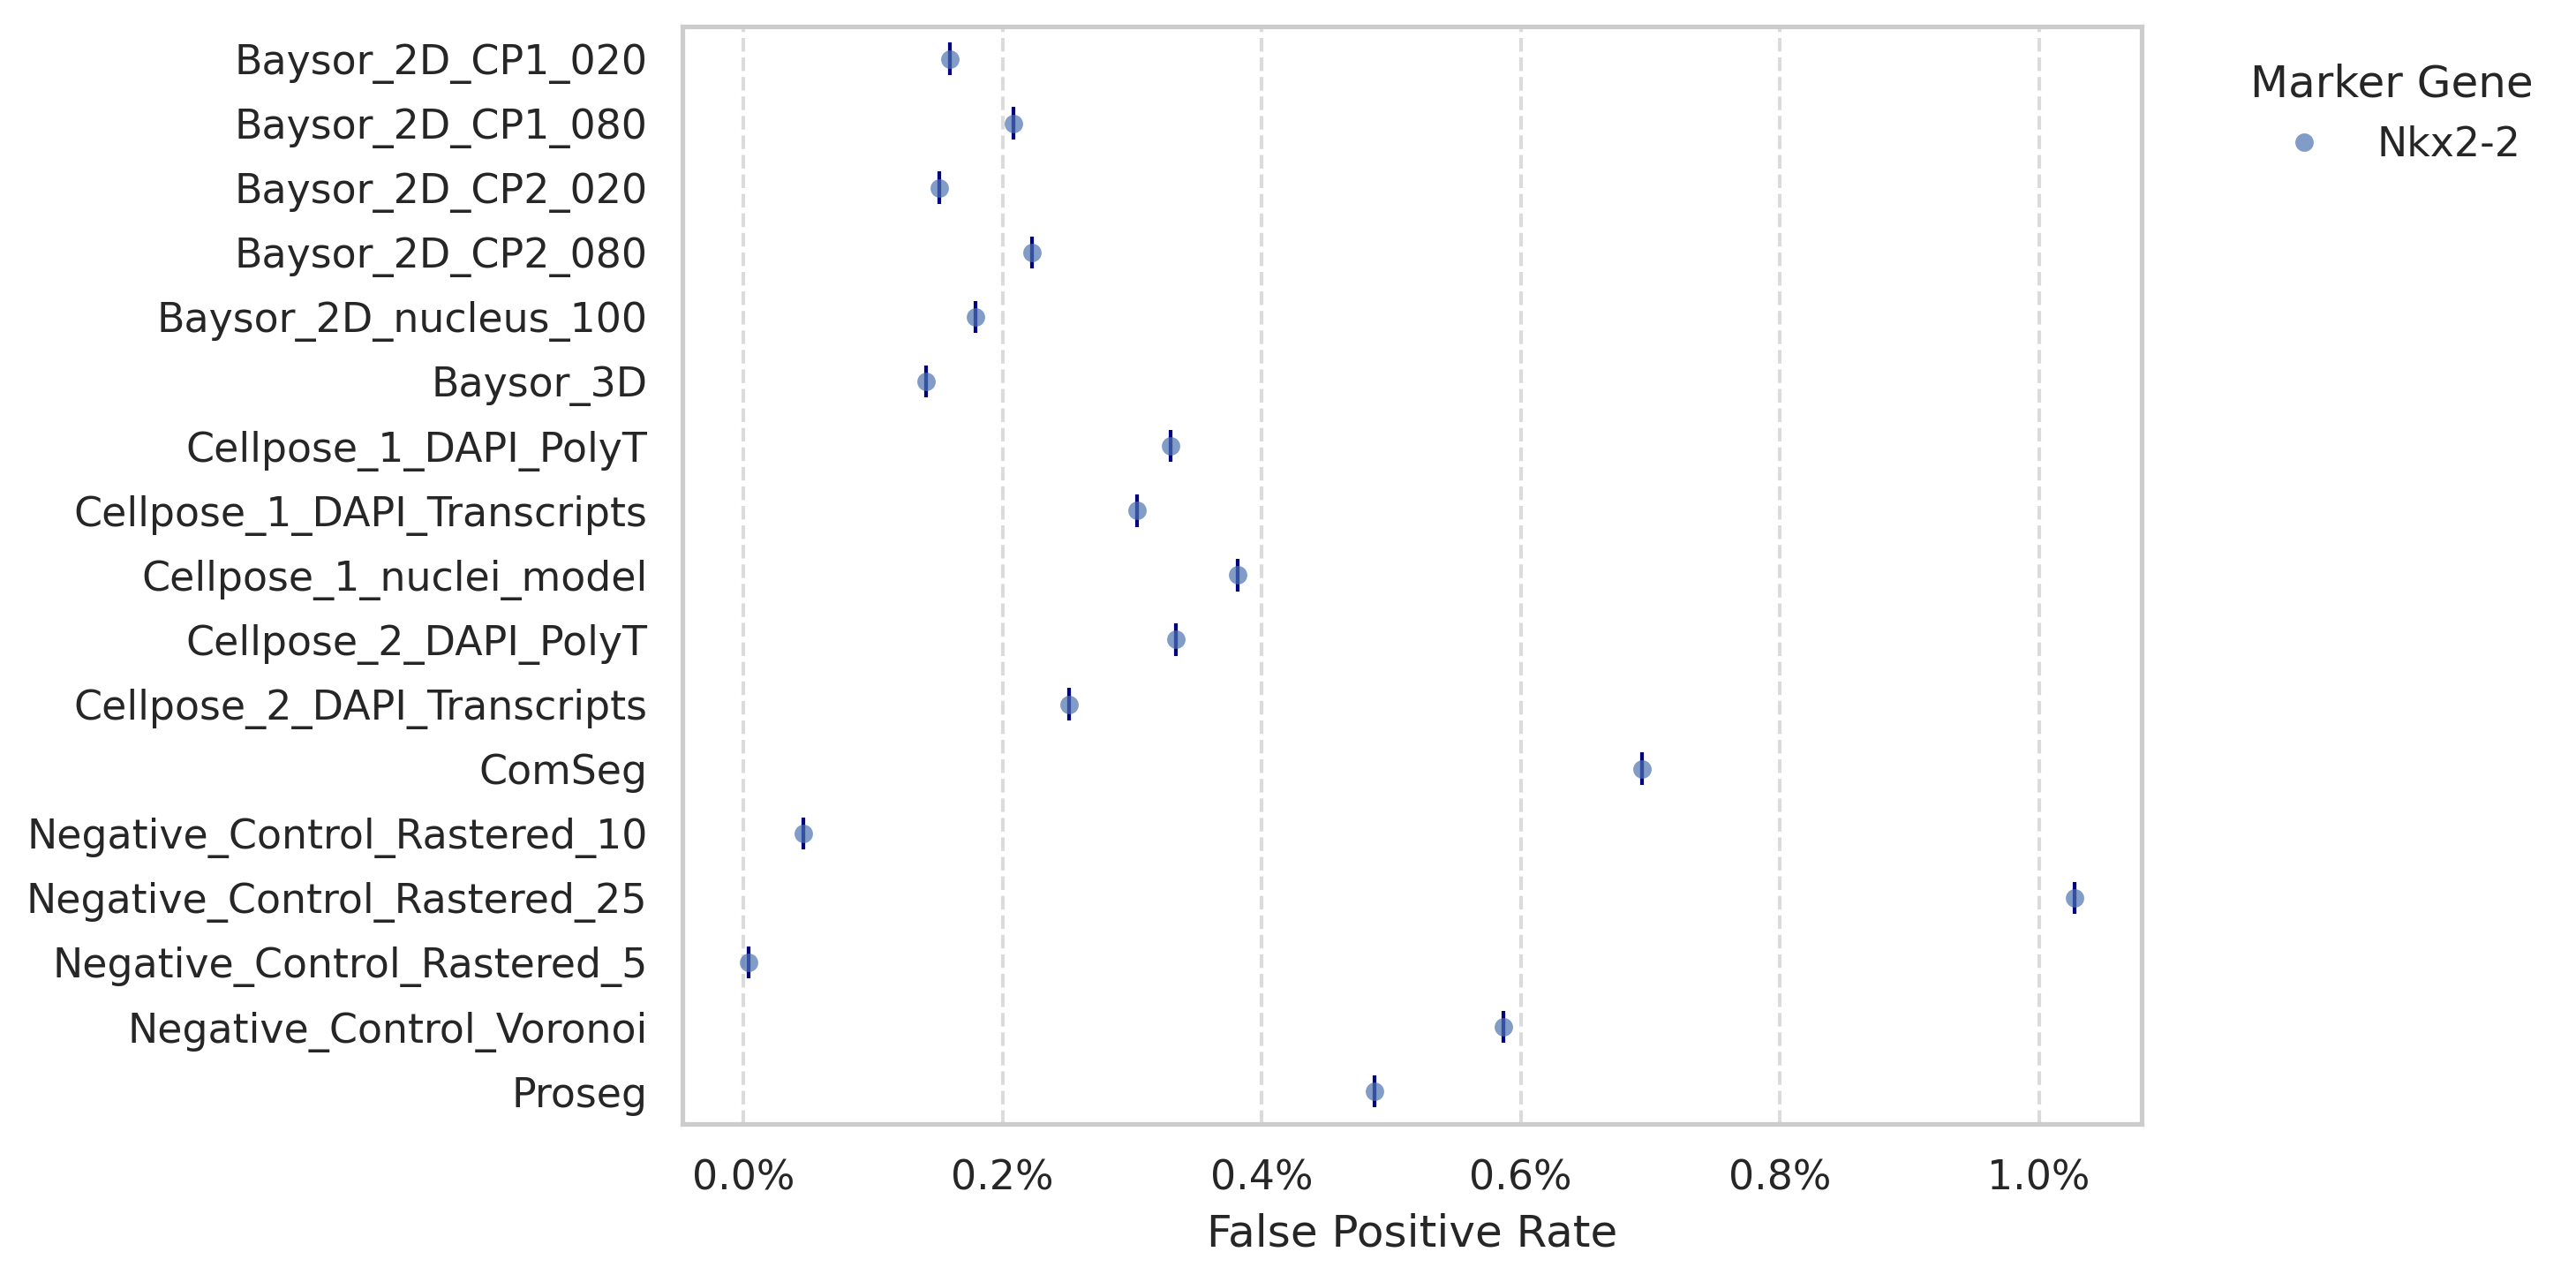

In [383]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Combine all results from the dictionary into a single DataFrame
all_results = pd.concat(results_dict.values(), ignore_index=True)

# Clean dataset names by removing "adata_" prefix
all_results["clean_dataset"] = all_results["dataset"].str.replace("adata_", "")

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5), dpi=300)

# Create horizontal box plot with cleaned dataset names and transparent boxes
ax = sns.boxplot(
    y="clean_dataset",
    x="false_positive_rate",
    data=all_results,
    palette="Blues",
    width=0.5,
    showfliers=False,
    boxprops=dict(alpha=0.2),
    medianprops=dict(color="navy"),
    whiskerprops=dict(alpha=0.3),
    capprops=dict(alpha=0.3),
)

# Add individual data points with swarm plot
sns.swarmplot(
    y="clean_dataset",
    x="false_positive_rate",
    hue="marker_gene",
    data=all_results,
    size=5,
    alpha=0.7,
    ax=ax,
)

plt.ylabel("", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)

# Format x-axis as percentage
ax.xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0, decimals=1))

# Adjust legend
plt.legend(title="Marker Gene", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add vertical grid lines
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()